<a href="https://colab.research.google.com/github/gabriellycristine1/Projetos_e_Atividades_Python/blob/main/PREDICT_MELANOMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import models
from keras.preprocessing import image
import zipfile
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from skimage.transform import resize
import tensorflow as tf
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -U efficientnet
import efficientnet.keras as efn
from efficientnet.tfkeras import EfficientNetB7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 7.1 MB/s 


In [4]:
path = '/content/drive/MyDrive/chest_orientation_model.zip'
zip_object = zipfile.ZipFile(file = path, mode='r')
zip_object.extractall('./')
zip_object.close()
path = '/content/drive/MyDrive/melanoma_cancer_dataset-20220802T172035Z-001.zip'
zip_object = zipfile.ZipFile(file = path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [5]:
modelo = tf.keras.models.load_model('/content/chest_orientation_model.hdf5')

In [54]:
img = Image.open('/content/melanoma_cancer_dataset-20220802T172035Z-001/melanoma_cancer_dataset/test/malignant/melanoma_10122.jpg')
img_np = np.array(img,'uint8')
img_np = np.expand_dims(img_np,axis=0)
img_np.shape

(1, 100, 100, 3)

In [55]:
previsor = modelo.predict(img_np)
print(previsor)

[[0. 1.]]


In [56]:
import torch

In [67]:
prev = torch.tensor(previsor)
novoPrev = torch.rand_like(prev, dtype=torch.float)
novoPrev = np.array(novoPrev)
print(novoPrev)

[[0.29725635 0.97984576]]


In [77]:
mal=novoPrev[0][1]
ben = novoPrev[0][0]

In [52]:
class_dict = {0:'benign',
              1:'malignant'}

MALIGNO
CHANCES DE SER BENIGNO: 29.73 %
CHANCES DE SER MALIGNO: 97.98 %


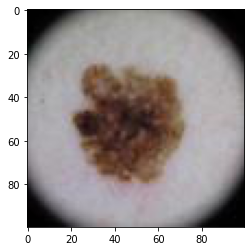

In [84]:
pred_class = np.argmax(novoPrev)
if pred_class == 0:
  print('BENIGNO')
elif pred_class == 1:
  print('MALIGNO')
plt.imshow(img)
porce_ben = ben*100
porce_mal = mal*100
print('='*10)
print('CHANCES DE SER BENIGNO:', '%.2f' % porce_ben,'%')
print('='*10)
print('CHANCES DE SER MALIGNO:', '%.2f' %porce_mal,'%')